Link to Medium blog post: https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab

# Finding the Percentage of Missing Values in a Pandas DataFrame

## Non-intuitive Solution

The final solution to this problem is not quite intuitive for most people when they first encounter it. We will slowly build up to it and also provide some other methods that get us a result that is close but not exactly what we want.

### Flights Dataset

We begin by reading in the flights dataset, which contains US domestic flight information during the year 2015. Pandas defaults the number of visible columns to 20. Since there are 31 columns in this DataFrame, we change this option below.

In [ ]:
import pandas as pd
>>> pd.options.display.max_columns = 100
>>> pd.read_csv('flights.csv')
>>> flights.head()

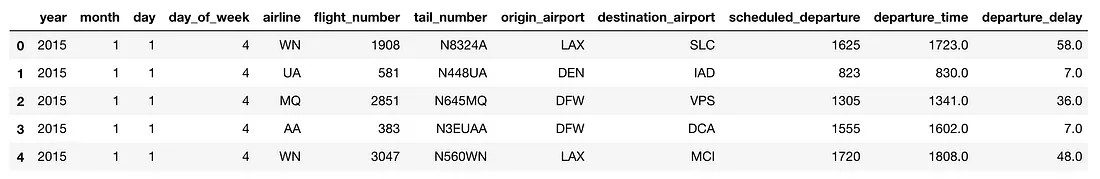

After inspecting the first few rows of the DataFrame, it is generally a good idea to find the total number of rows and columns with the shape attribute.

In [ ]:
>>> flights.shape
(58492, 31)

### The info method

Pandas comes with a couple methods that get us close to what we want without getting us all the way there. The info method prints to the screen the number of non-missing values of each column, along with the data types of each column and some other meta-data.

In [ ]:
>>> flights.info()

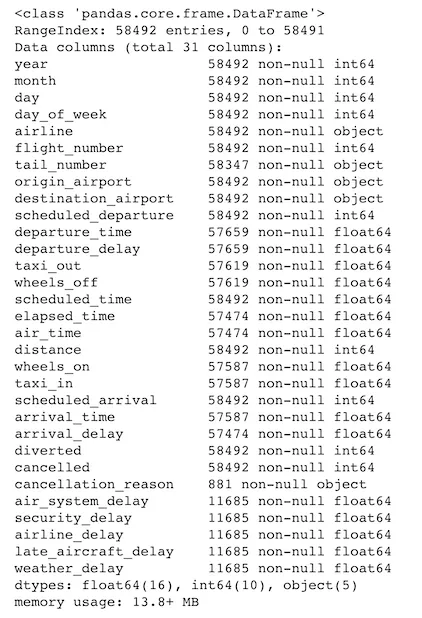

### The count method

The count method returns the number of non-missing values for each column or row. By default, it operates column-wise. It doesn’t give us any more information that is already available with the info method. Below, we just output the last 5 values.

In [ ]:
>>> flights.count().tail()

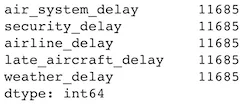

### The returned objects of the info and count methods

Although the count method doesn’t yield us any extra information over the info method, it returns a Pandas Series which can be used for further processing. The info method prints its output to the screen and returns the object None. Let’s verify this below:

In [ ]:
>>> info_return = flights.info()
>>> count_return = flights.count()
>>> info_return is None
True
>>> type(count_return)
pandas.core.series.Series

### The isna method

The isna method returns a DataFrame of all boolean values (True/False). The shape of the DataFrame does not change from the original. Each value is tested whether it is missing or not. If it is, then its new value is True otherwise it is False.

In [ ]:
>>> flights_missing = flights.isna()
>>> flights_missing.head()

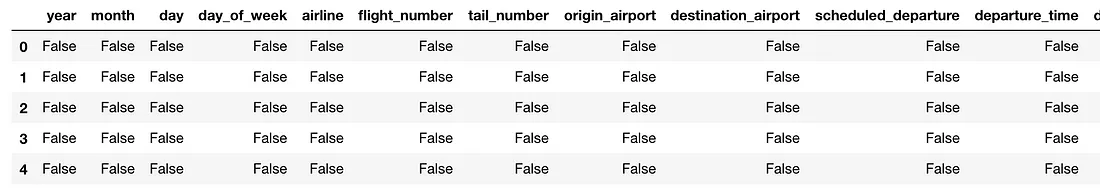

The first several columns don’t have any missing values in their first few rows, but if we scroll to the end, we can see many missing values do exist.



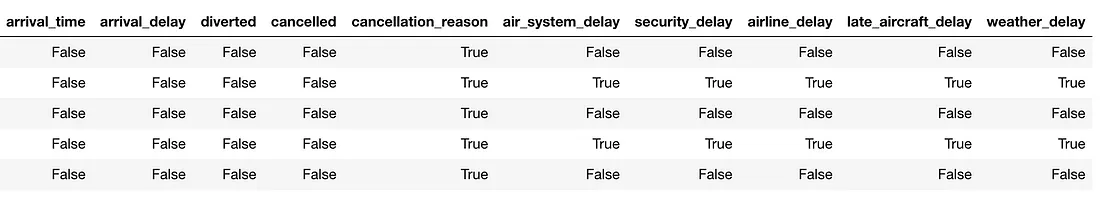

### Ensuring we have all boolean columns

We can verify that result of calling the isna method is indeed a new DataFrame with all columns having the boolean data type. Let’s call the dtypes attribute.

In [ ]:
>>> flights_missing.dtypes

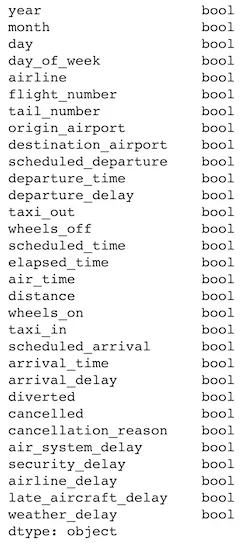

This guarantees us that every single value in the entire is either True of False.

### Summing a boolean DataFrame

Booleans in Python are treated as numeric when doing arithmetic operations. False evaluates as 0 and True evaluates as 1. Therefore, we can call the sum method on the DataFrame, which by default sums each column independently.

In [ ]:
>>> flights_num_missing = flights_missing.sum()
>>> flights_num_missing

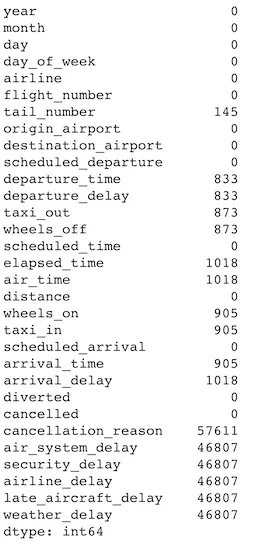

### Interpreting this output

We summed up each column in the boolean DataFrame, which is summing up just False and True values. This result simply returns the number of values that are True. In our case the True values represent missing values in our original DataFrame, so we now have the number of missing values in each column.

### Turning this result into a percentage

Now that we have the total number of missing values in each column, we can divide each value in the Series by the number of rows. The built-in len function returns the number of rows in the DataFrame.

In [ ]:
>>> len(flights)
58492
>>> flights_num_missing / len(flights)

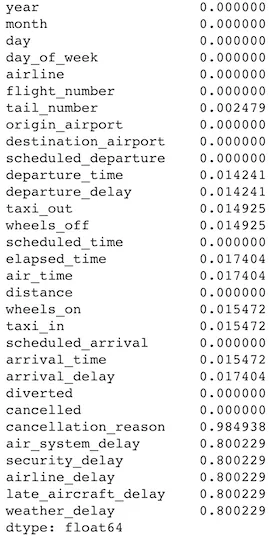

### What simple operation did we just do?

There is a name for the operation that we just completed. Summing up all the values in a column and then dividing by the total number is the mean.

### Using the mean method directly

Instead of calling the sum method and dividing by the number of rows, we can call the mean method directly on the flights_missing DataFrame. This produces the exact same result as the last output.

In [ ]:
>>> flights_missing.mean()

### A one-line solution


We can put all our work together in a single line of code beginning with our flights DataFrame. We remove excess decimal noise by rounding and then multiply each value by 100 to get a percentage.

In [ ]:
>>> flights.isna().mean().round(4) * 100

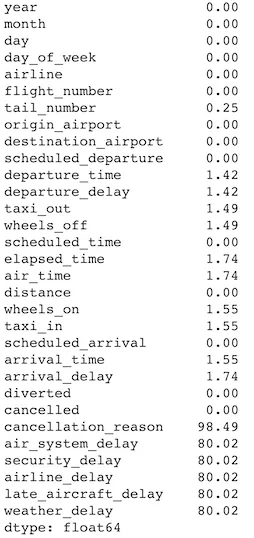

### An alternative with the count method

Alternatively, we can get the same result by taking the result of the count method and dividing by the number of rows. This gives us the percentage of non-missing values in each column.

In [ ]:
>>> flights.count() / len(flights)

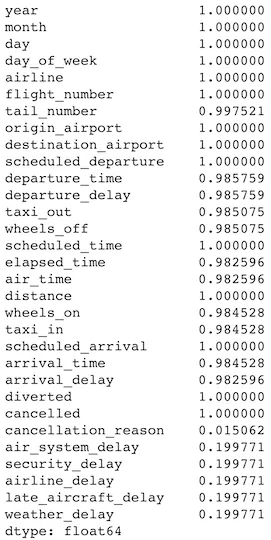

From here, we can subtract each value in the Series from 1 to get the same result as the one-line solution from above. Again, the output has not been shown.

In [ ]:
>>> 1 - flights.count() / len(flights)

## Generalizing boolean operations

This same idea can be used for any boolean Series/DataFrame. Let’s see how we can find the number and percentage of flights that have arrival delays longer than 60 minutes.

First, let’s determine whether each flight has an arrival delay greater than 60 minutes by using a boolean comparison and assigning the result to a variable.

In [ ]:
>>> gt_60 = flights['departure_delay'] > 60
>>> gt_60.head()

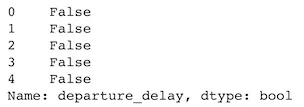

### Use sum and mean methods to find total and percentage

Once we create a boolean Series/DataFrame, we can use the sum and mean methods to find the total and percentage of values that are True. In this case, it’s the number and percentage of flights with arrival delays greater than one hour.

In [ ]:
>>> gt_60.sum()
3626
>>> gt_60.mean()
0.06199138343705122

We can now report that we have 3,626 flights or 6.2% that have arrival delays greater than one hour.



### The two-step process of finding the total or percentage of True values

1. Create a boolean Series/DataFrame

2. Call sum to find the number of True values and mean to find the percentage of True values